In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('orders_20190822.csv', sep=";", parse_dates=['o_date'],  thousands=',')  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002804 entries, 0 to 2002803
Data columns (total 4 columns):
 #   Column   Dtype         
---  ------   -----         
 0   id_o     int64         
 1   user_id  int64         
 2   price    int64         
 3   o_date   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 61.1 MB
None


In [4]:
df.head()

,id_o,user_id,price,o_date
0,1234491,337544,539000,2016-01-01
1,1234494,171642,153300,2016-01-01
2,1234497,260596,55300,2016-01-01
3,1234498,1105609,752500,2016-01-01
4,1234500,982696,4410000,2016-01-01


In [5]:
sum_price = df['price'].sum()

In [6]:
sum_user = df['user_id'].nunique()

### Средний чек за все время

In [7]:
avg = sum_price / sum_user
print(avg)

4475029.470682748


Дата начала сбора данных

In [8]:
df['o_date'].min()

Timestamp('2016-01-01 00:00:00')

Дата конца сбора данных

In [9]:
df['o_date'].max()

Timestamp('2017-12-31 00:00:00')

Смотрим минимальную цену, значение отрицательное... Или что то напутали, или был возврат 

In [10]:
df['price'].min()

-184800

In [11]:
df['price'].max()

819096600

Количество покупок для каждого пользователя

In [12]:
df_sorted = df.groupby("user_id")["id_o"].count().to_frame()

In [13]:
df_sorted.head()

,id_o
user_id,
0,1
1,2
76,2
90,4
91,4


# Количество покупок по пользователю  и сумма заказов





In [14]:
df_per_user = df.groupby('user_id')['price'].agg(['sum', 'count'])

In [15]:
df_per_user

,sum,count
user_id,,
0,494200,1
1,13844600,2
76,1863400,2
90,6561800,4
91,5413100,4
...,...,...
5919114,1272600,1
5919118,7242200,1
5919128,886900,1


Количество заказов 

In [16]:
df['id_o'].count()

2002804

# Выбор данных по годам 

In [17]:
mask_2016 = (df['o_date'] >= '2016-01-01') & (df['o_date'] <= '2016-12-31')

In [18]:
mask_2017 = (df['o_date'] >= '2017-01-01') & (df['o_date'] <= '2017-12-31')

In [19]:
df_2016 = df.loc[mask_2016]

In [20]:
df_2017 = df.loc[mask_2017]

In [21]:
df_2016['o_date'].max()

Timestamp('2016-12-31 00:00:00')

In [22]:
df_2017['o_date'].max()

Timestamp('2017-12-31 00:00:00')

In [23]:
df_2017_pd = df_2017.set_index('o_date')['id_o'].groupby(pd.Grouper(freq='d')).count().to_frame()

In [24]:
df_2016_pd = df_2016.set_index('o_date')['id_o'].groupby(pd.Grouper(freq='d')).count().to_frame()

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

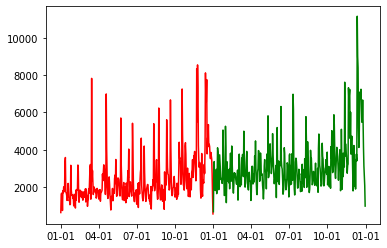

In [26]:
fig, ax = plt.subplots()
plt.plot(df_2016_pd.id_o ,'-r', label="Price")
plt.plot(df_2017_pd.id_o ,'-g', label="Price")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Срединий чек

## Средний чек за 2016

In [27]:
avg = df_2016['price'].sum() / df_2016['user_id'].nunique()
print(avg)

4055392.261936858


In [28]:
avg_sale_2016 = df_2016['id_o'].count()/ df_2016['user_id'].nunique()
print(avg_sale_2016)

1.9352089006317794


## Средний чек за 2017

In [29]:
avg = df_2017['price'].sum() / df_2017['user_id'].nunique()
print(avg)

4180317.4080080134


In [30]:
avg_sale_2017 = df_2017['id_o'].count()/ df_2017['user_id'].nunique()
print(avg_sale_2017)

1.74296603725183



# 5. Найти кол-во пользователей, которые покупали в одном году и перестали покупать в следующем.

## Пользователи которые сделали покупки в 2016 но не в 2017

In [35]:
df_2016[~df_2016['user_id'].isin(df_2017['user_id'])].dropna(how = 'all')

,id_o,user_id,price,o_date
0,1234491,337544,539000,2016-01-01
3,1234498,1105609,752500,2016-01-01
4,1234500,982696,4410000,2016-01-01
5,1234503,1105614,595000,2016-01-01
6,1234506,1105617,826000,2016-01-01
...,...,...,...,...
861331,3529276,2838382,733600,2016-12-31
861336,3529296,2838390,17359300,2016-12-31
861339,3529305,2838399,436100,2016-12-31
861343,3529317,2775404,1418900,2016-12-31


In [42]:
df.groupby('user_id').id_o.count().sort_values()

user_id
0             1
3882447       1
3882453       1
3882458       1
3882461       1
           ... 
53832      2061
186744     2242
221047     2347
39506      2698
765861     3183
Name: id_o, Length: 1015119, dtype: int64

Пользователь 765861 самый активный с 3183 заказов